### **Problem 1: Expectation-Maximization Algorithm for Clustering**

Implement expectation-maximization algorithm for Gaussian mixture models (see the EM algorithm below) in Python and call this program Gk. As you present your code explain your protocol
for
1. Initializing Gaussian
2. Deciding ties
3. Stopping criteria

In [125]:
import pandas as pd
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
import random
%matplotlib inline
random.seed(30)

In [126]:
def initialize(data,clusters):
    a,b = data.shape
    means = np.zeros((clusters,b),dtype=np.float)
    covariances = np.zeros((clusters,b,b),dtype=np.float)
    p =  np.asarray(np.repeat(1.0/clusters,clusters),dtype=np.float) 
    return means,covariances,p

In [127]:
def Estimation_Maximization(data,y,clusters,epsilon,maximum_iteration):
    total_iterations = 0
    means,covariances,priors = initialize(data,clusters)
    for item in range(clusters):
        means[item] = data[random.randint(0,len(data))]
        covariances[item] = np.identity(data.shape[1])
            
    accuracies = []
    for i in range(maximum_iteration):
        init_means = means.copy()
        weights = np.zeros((clusters,data.shape[0]),dtype=np.float)

        for k in range(clusters):
            weights[k] = (multivariate_normal.pdf(data,mean=means[k],cov = covariances[k],allow_singular=True))* priors[k]
        t = weights.sum(axis=0)
        weights=weights/t
        for k in range(clusters):
            covariances[k] = np.dot((data-means[k]).T,(data-means[k]) * weights.T[:,k][:,np.newaxis]) / (weights.sum(axis=1)[k])
            means[k] = (data*weights.T[:,k][:,np.newaxis]).sum(axis=0)/weights.sum(axis=1)[k]
        priors = weights.sum(axis=1)/data.shape[0]
        total_value = 0
        for j in range(clusters):
            total_value = total_value + np.sqrt(np.power((means[j] - init_means[j]),2).sum())
        total_value = round(total_value,4)
        print(total_value)
        
            
        for k in range(clusters):
            weights[k] = (multivariate_normal.pdf(data,mean=means[k],cov = covariances[k],allow_singular=True))* priors[k]
        weights=weights/weights.sum(axis=0)


        algo_predictions =  np.argmax(weights,axis=0)

        ground_truth_unique_clusters = np.unique(y)
        means_gt = []
        for k in range(len(ground_truth_unique_clusters)):
            means_gt.append(data[np.where(y==ground_truth_unique_clusters[k])].mean(axis=0))


        preducted_unique_clusters = np.unique(algo_predictions)
        means_preds = []
        for k in range(len(preducted_unique_clusters)):
            means_preds.append(data[np.where(algo_predictions==preducted_unique_clusters[k])].mean(axis=0))


        output = []
        for i,m in enumerate(means_preds):
            compare = []
            for j,mm in enumerate(means_gt):
                magnitude = np.sqrt(sum(x**2 for x in (m - mm)))
                compare.append(magnitude)
            output.append(ground_truth_unique_clusters[np.argmin(compare)])
        o_pred = []
        for i in range(len(algo_predictions)):
            o_pred.append(output[np.argwhere(preducted_unique_clusters == algo_predictions[i])[0][0]])
        accuracy = float(np.sum(y == o_pred)) / len(algo_predictions)
        accuracies.append(accuracy)
        
        if total_value<=epsilon:
            break
        if total_iterations>0:
            if accuracies[-2] == accuracy:
                break
    
        total_iterations+=1
    return total_iterations,[1-x for x in accuracies]

##### 1. Initializing Gaussian

- Initialized the means with a random datapoint from the dataset 
- Initialized the covariance matrix as an identity matrix 
- Initialized the weights matrix with zeros
- Uniform probabilities are used to initialize the priors.

#### 2. Deciding Ties

- To allocate clusters to the datapoints, I use np.argmax. In the event of a tie, the argmax function will return the index of the cluster with the lowest I i.e. the first cluster between the tied clusters.

#### 3.Stopping Criteria

- When the cluster centroids do not appear to change, a variable called epsilon is used to stop the program from running. Tolerance values in the range of 0.01,0.001 are used.

### **Problem 2: Analysis of the EM over Real-world Data Sets**

In [128]:
import pandas as pd
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
import warnings as warnings

In [129]:
def initialize(data,clusters):
    a,b = data.shape
    means = np.zeros((clusters,b),dtype=np.float)
    covariances = np.zeros((clusters,b,b),dtype=np.float)
    p =  np.asarray(np.repeat(1.0/clusters,clusters),dtype=np.float) 
    return means,covariances,p

In [130]:
def Estimation_Maximization(data,y,clusters,epsilon,maximum_iteration):
    total_iterations = 0
    means,covariances,priors = initialize(data,clusters)
    for item in range(clusters):
        
        means[item] =data[random.randint(0,len(data)-1)]
        
        covariances[item] = np.identity(data.shape[1])
        
    accuracies = []
    for i in range(maximum_iteration):
        init_means = means.copy()
        weights = np.zeros((clusters,data.shape[0]),dtype=np.float)

        for k in range(clusters):
            weights[k] = (multivariate_normal.pdf(data,mean=means[k],cov = covariances[k],allow_singular=True))* priors[k]
        t = weights.sum(axis=0)
        weights=weights/t
        for k in range(clusters):
            covariances[k] = np.dot((data-means[k]).T,(data-means[k]) * weights.T[:,k][:,np.newaxis]) / (weights.sum(axis=1)[k])
            means[k] = (data*weights.T[:,k][:,np.newaxis]).sum(axis=0)/weights.sum(axis=1)[k]
        priors = weights.sum(axis=1)/data.shape[0]
        total_value = 0
        for j in range(clusters):
            total_value = total_value + np.sqrt(np.power((means[j] - init_means[j]),2).sum())
        total_value = round(total_value,4)
        
            
        for k in range(clusters):
            weights[k] = (multivariate_normal.pdf(data,mean=means[k],cov = covariances[k],allow_singular=True))* priors[k]
        weights=weights/weights.sum(axis=0)


        algo_predictions =  np.argmax(weights,axis=0)

        ground_truth_unique_clusters = np.unique(y)
        means_gt = []
        for k in range(len(ground_truth_unique_clusters)):
            means_gt.append(data[np.where(y==ground_truth_unique_clusters[k])].mean(axis=0))


        preducted_unique_clusters = np.unique(algo_predictions)
        means_preds = []
        for k in range(len(preducted_unique_clusters)):
            means_preds.append(data[np.where(algo_predictions==preducted_unique_clusters[k])].mean(axis=0))

        output = []
        for i,m in enumerate(means_preds):
            compare = []
            for j,mm in enumerate(means_gt):
                magnitude = np.sqrt(sum(x**2 for x in (m - mm)))
                compare.append(magnitude)
            output.append(ground_truth_unique_clusters[np.argmin(compare)])
        prediction = []
        for i in range(len(algo_predictions)):
            prediction.append(output[np.argwhere(preducted_unique_clusters == algo_predictions[i])[0][0]])
        accuracy = float(np.sum(y == prediction)) / len(algo_predictions)
        accuracies.append(accuracy)
        
        if total_value<=epsilon:
            break
        if total_iterations>0:
            if accuracies[-2] == accuracy:
                break
    
        total_iterations+=1
    return total_iterations,[1-x for x in accuracies],accuracy

In [131]:
dataset = pd.read_csv("Downloads/ionosphere.data",header=None)

In [144]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values


n_cluster = [1,2,3,4]
maximum_iteration = 20
epsilon = 0.001
error = []
iterations = []
warnings.filterwarnings("ignore")

for item in n_cluster:
    te,err,acc = Estimation_Maximization(X,y,item,epsilon,maximum_iteration)
    print(f"final accuracy at the end of iteration {te} is {acc}")
    
    print("errors per iteration",err)
    print("iterations",te)
    error.append(err)
    iterations.append(te)

final accuracy at the end of iteration 1 is 0.6410256410256411
errors per iteration [0.3589743589743589, 0.3589743589743589]
iterations 1
final accuracy at the end of iteration 6 is 0.9173789173789174
errors per iteration [0.20512820512820518, 0.10541310541310545, 0.07977207977207978, 0.07407407407407407, 0.07122507122507127, 0.08262108262108259, 0.08262108262108259]
iterations 6
final accuracy at the end of iteration 7 is 0.811965811965812
errors per iteration [0.27920227920227925, 0.2592592592592593, 0.24786324786324787, 0.23361823361823364, 0.20227920227920226, 0.19088319088319083, 0.18803418803418803, 0.18803418803418803]
iterations 7
final accuracy at the end of iteration 8 is 0.8575498575498576
errors per iteration [0.3105413105413105, 0.20227920227920226, 0.16524216524216528, 0.15954415954415957, 0.14814814814814814, 0.14529914529914534, 0.13960113960113962, 0.14245014245014243, 0.14245014245014243]
iterations 8


**plot 1 <br>**
x-axis: number of clusters (k) <br>
y-axis: error rate

[Text(0, 1, '1'), Text(0, 2, '2'), Text(0, 3, '3'), Text(0, 4, '4')]

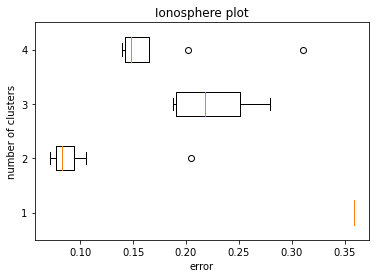

In [145]:
fig, a = plt.subplots(1,1) 
a.boxplot(error,vert=0)

a.set_title("Ionosphere plot")
a.set_ylabel("number of clusters")
a.set_xlabel("error")
a.set_yticklabels(["1","2","3","4"])



**plot 2 <br>**
x-axis: number of clusters (k)<br>
y-axis: number of iterations until convergence

In [146]:
total_iterations

[4, 7, 4, 7]

[Text(0, 1, '1'), Text(0, 2, '2'), Text(0, 3, '3'), Text(0, 4, '4')]

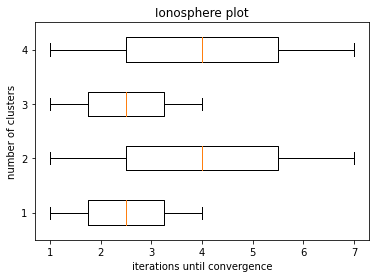

In [147]:
fig, a = plt.subplots(1,1) 
a.boxplot([np.arange(item+1)[1:] for item in total_iterations],vert=0)

a.set_title("Ionosphere plot")
a.set_ylabel("number of clusters")
a.set_xlabel("iterations until convergence")
a.set_yticklabels(["1","2","3","4"])


In [148]:
ringnorm_data = pd.read_csv("Downloads/ringnorm.csv")

In [149]:
from sklearn.preprocessing import StandardScaler

In [150]:
X = ringnorm_data.iloc[:,:-1].values
y = ringnorm_data.iloc[:,-1].values

scaled = StandardScaler().fit_transform(X)
n_cluster = [1,2,3,4]
maximum_iteration = 20
epsilon = 0.001
error = []
iterations = []

for item in n_cluster:
    te,err,acc= Estimation_Maximization(scaled,y,item,epsilon,maximum_iteration)
    print(f"final accuracy at the end of iteration {te} is {acc}")
    print("errors per iteration",err)
    
    print("iterations",te)
    error.append(err)
    iterations.append(te)

final accuracy at the end of iteration 1 is 0.5048648648648648
errors per iteration [0.4951351351351352, 0.4951351351351352]
iterations 1
final accuracy at the end of iteration 10 is 0.9790540540540541
errors per iteration [0.46432432432432436, 0.4077027027027027, 0.3036486486486486, 0.1745945945945946, 0.07337837837837835, 0.032432432432432434, 0.02310810810810815, 0.02189189189189189, 0.021216216216216166, 0.0209459459459459, 0.0209459459459459]
iterations 10
final accuracy at the end of iteration 9 is 0.9785135135135136
errors per iteration [0.3340540540540541, 0.14918918918918922, 0.05486486486486486, 0.026756756756756706, 0.022162162162162158, 0.02202702702702708, 0.021351351351351355, 0.021216216216216166, 0.021486486486486434, 0.021486486486486434]
iterations 9
final accuracy at the end of iteration 7 is 0.9787837837837838
errors per iteration [0.3087837837837838, 0.14756756756756761, 0.05081081081081085, 0.025540540540540557, 0.022162162162162158, 0.021621621621621623, 0.021216

**plot 1 <br>**
x-axis: number of clusters (k) <br>
y-axis: error rate

[Text(0, 1, '1'), Text(0, 2, '2'), Text(0, 3, '3'), Text(0, 4, '4')]

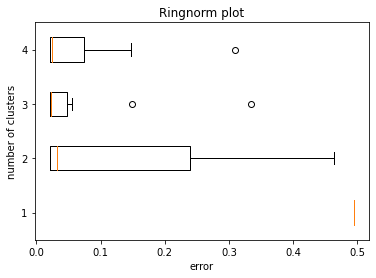

In [151]:
fig, a = plt.subplots(1,1) 
a.boxplot(error,vert=0)

a.set_title("Ringnorm plot")
a.set_ylabel("number of clusters")
a.set_xlabel("error")
a.set_yticklabels(["1","2","3","4"])



**plot 2 <br>**
x-axis: number of clusters (k)<br>
y-axis: number of iterations until convergence

[Text(0, 1, '1'), Text(0, 2, '2'), Text(0, 3, '3'), Text(0, 4, '4')]

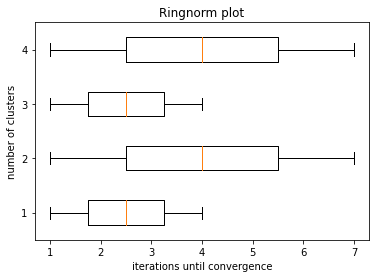

In [152]:
fig, a = plt.subplots(1,1) 
a.boxplot([np.arange(item+1)[1:] for item in total_iterations],vert=0)

a.set_title("Ringnorm plot")
a.set_ylabel("number of clusters")
a.set_xlabel("iterations until convergence")
a.set_yticklabels(["1","2","3","4"])


## Problem 3.1: 

Given a text D and a pattern P, describe an Ω(d+p) time method for finding the longest prefix
of P that is a substring of D. The lengths of D and P are d and p, respectively.

In [153]:
def compute_kmp_fail(P):
    m = len(P)
    fail = [0] * m
    j = 1
    k = 0
    while j < m:
        if P[j] == P[k]:
            fail[j] = k+1
            j += 1
            k += 1
        elif k > 0:
            k = fail[k-1]
        else:
            j += 1
    return fail




def find_kmp(T, P):
    n, m = len(T), len(P)
    if m == 0:
        return 0
    fail = compute_kmp_fail(P)
    j = 0
    k = 0
    max_length = 0
    while j < n:
        if T[j] == P[k]:
            if k == m-1:
                max_length = max(k+1,max_length)
                return max_length
            j += 1
            k += 1
            max_length=max(k,max_length)
        elif k > 0:
            k = 0
        else:
            j += 1
    return max_length

D = 'abacabababab ababc'
P = 'abab'

output = find_kmp(D,P)
print("Length of longest prefix is {0}" .format(output,P[:output]))
print("Longest prefix is {1}" .format(output,P[:output]))

Length of longest prefix is 4
Longest prefix is abab


## Problem 3.2: 

X, Y, and Z are three arrays and each has m elements. For an arbitrary integer t, describe
O(m2logm)-time algorithm to determine if there exist numbers, x in X, y in Y, and z in Z, such
that t = x+y+z.


In [154]:
def binary_search(arr,output,start,end):
    if start>end:
        return False
    else:
        mid = (start + end)//2
    if output==arr[mid]:
        return True
    elif output<arr[mid]:
        return binary_search(arr,output,start,mid-1)
    else:
        return binary_search(arr,output,mid+1,end)

def triplet(t,X,Y,Z):
    Z.sort()
    for item in range(len(X)):
        for item1 in range(len(Y)):
            output = t - X[item] -Y[item1]
            if binary_search(Z,output,0,len(Z)-1):
                return True
    return False


x, y, z = [1,2,3,4,5,6], [11,22,33,44,55,66], [45,32,12,23,54,15]
triplet(94,x,y,z)

True

## Explanation:
The purpose of this task is to create an algorithm that will detect if there are any values, x in X, y in Y, and z in Z, where t = x+y+z. Each of the three arrays, X, Y, and Z, has the same items. The sort method in Python is used to sort the third array Z. Then, using a for loop, iterate over the elements of the first array X. To iterate along Z's elements, a second for loop is utilized inside the first for loop. Answer = t - element of X - element of Y is an example of a variable t. The variable response is now examined in array 3 Z to determine if it exists. The binary search tree is used for this search. 

<b>Binary search tree</b>:
The middle index is computed first.
Check to see if the center element is the one that needs to be found. Return True if the answer is yes.
Else, Repeat binary search with start index 0 and final index mid-1 if element is less than middle element.
Else, Repeat binary search with start index mid+1 and final index length of array if element is greater than middle element.
Continue in this manner until the array is depleted. Start index > last index, for example. Return False if the element isn't found.

<b> Time Complexity </b>:
1. Sort array- 0(mlogm)
2. For loop take O(m) time
3. Another for loop also take O(m) time.
4. Binary search takes O(logm) time

Result = O(m*m*logm) + O(mlogm) = O(m^2logm) + O(mlogm)
Time complexity = O(m^2logm)

## Problem 3.3:

Describe an efficient algorithm for deleting a string from a compressed trie and analyze its running time.

# Algorithm : 
```
str: string to be deleted

function <- deletestring(compressed trie, str)
{
    if str not in compressed trie then
        return False
    else then 
    {
        Node <- node containing the string to be erased
        if Node has child nodes or string to be erased isn't full string present at Node then
        {
            return False #internal node can't be deleted
        }
        delete Node
        parent <- parent of Node
        if parent has child ch then
        {
            parent.str = parent.str + ch.str. # merge two nodes
            delete node ch #We can remove nodes after merging.
        }
        return True #deleted successfully
    }
}
            
        
```
## Explanation :
A delete string function is developed, which takes as input compressed trie and the string to be removed.

First, we determine if the string to be removed exists in the compressed trie; if it does not, false is returned.

If that's the case, we'll look for a node that has a string.

We determine if node N has a child or whether the text to be removed is complete.

If the above mentioned condition is true, we can't remove an internal node, hence a false is returned.

If the condition is false, we remove node N, then combine nodes to meet the compressed trie requirement, then delete child nodes.